# **CROP RECOMMENDATION SYSTEM**

#### **About the data**

The data have Nitrogen, Phosphorous, Pottasium and pH values of the soil. Also, it also contains the humidity, temperature and rainfall required for a particular crop.

| Data Field   | Description                                        |
|--------------|----------------------------------------------------|
| N            | Ratio of Nitrogen content in soil                 |
| P            | Ratio of Phosphorous content in soil               |
| K            | Ratio of Potassium content in soil                 |
| temperature  | Temperature in degree Celsius                      |
| humidity     | Relative humidity in %                             |
| ph           | pH value of the soil                               |
| rainfall     | Rainfall in mm                                     |


### **Crop recommendation using multiple algorithms**

In [103]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [104]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [105]:
df = df.rename(columns={'rainfall': 'rainfall_expected'})

In [106]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall_expected,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [107]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall_expected,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [108]:
df.size

17600

In [109]:
df.shape

(2200, 8)

In [110]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall_expected',
       'label'],
      dtype='object')

In [111]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [112]:
df.dtypes

N                      int64
P                      int64
K                      int64
temperature          float64
humidity             float64
ph                   float64
rainfall_expected    float64
label                 object
dtype: object

In [113]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [114]:
df

,N,P,K,temperature,humidity,ph,rainfall_expected,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


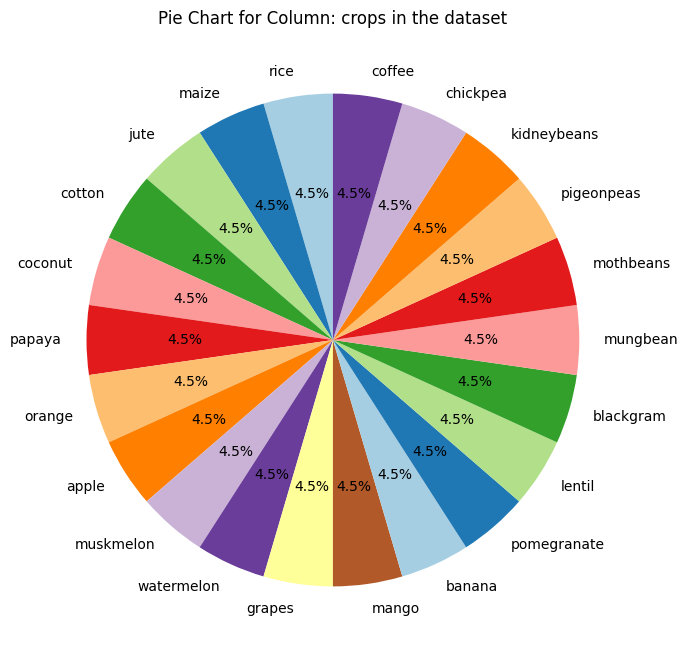

In [115]:
values = df['label'].value_counts()
labels = values.index

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart for Column: crops in the dataset')
plt.show()

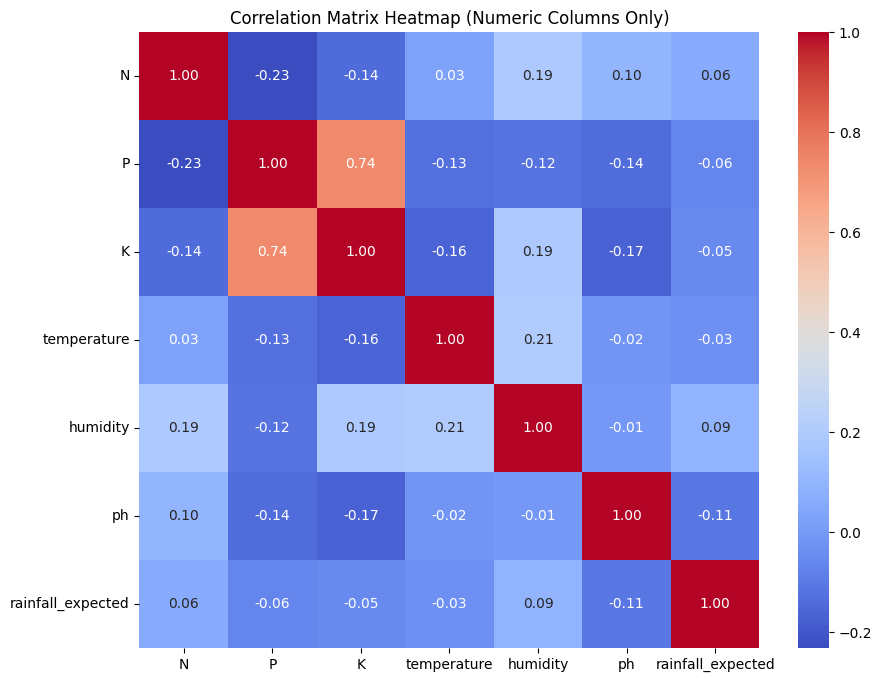

In [116]:
numeric_columns = df.select_dtypes(exclude=['object'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap="coolwarm") 
plt.title("Correlation Matrix Heatmap (Numeric Columns Only)")
plt.yticks(rotation=360, ha='right')
plt.show()

### Seperating features and target label

In [118]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall_expected']]
target = df['label']
labels = df['label']

In [119]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [120]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  0.9
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00    

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [124]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [125]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [127]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [128]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [129]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

In [130]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [132]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving trained Logistic Regression model

In [133]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()


# Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [135]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [136]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [137]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Assuming Ytrain and Ytest are your target variables

# Use LabelEncoder to convert string classes to numerical labels
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Create an instance of XGBoost classifier
XB = xgb.XGBClassifier()

# Fit the model
XB.fit(Xtrain, Ytrain_encoded)

# Make predictions on the test set
predicted_values = XB.predict(Xtest)

# Calculate accuracy
x = accuracy_score(Ytest_encoded, predicted_values)
print("XGBoost's Accuracy is: ", x)

# Print classification report
print(classification_report(Ytest_encoded, predicted_values))

# Cross-validation score (XGBoost)
score = cross_val_score(XB, Xtrain, Ytrain_encoded, cv=5)
print("Cross-validation scores:", score)


XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

### Saving trained XGBoost model

In [138]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

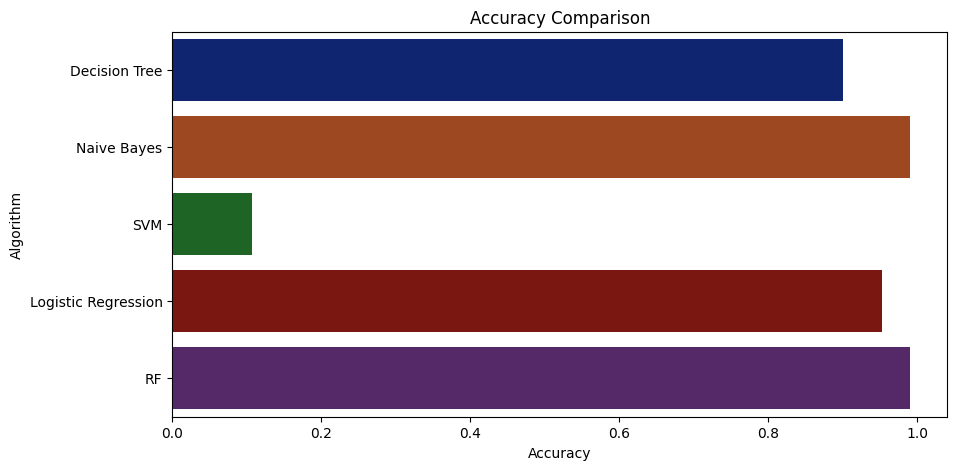

In [139]:
plt.figure(figsize=[10,5])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [140]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.10681818181818181
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091


## Making a prediction

In [141]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [142]:
def prediction():
    N = float(input("Ratio of Nitrogen content in soil"))
    P=float(input("Ratio of Phosphorous content in soil"))
    K =float(input("Ratio of Potassium content in soil"))
    temp = float(input("Temperature in degree Celsius"))
    humi=float(input("Relative humidity in %"))
    ph=float(input("pH value of the soil"))
    rain =float(input("Rainfall in mm"))
    data = np.array([[N,P,K,temp,humi,ph,rain]])
    
    prediction = RF.predict(data)
    print(f"We can sow {prediction},when the soil has :\nNitrogen: {N}%,\nPhosphorous: {K}%,\nPotassium: {P}%,\nTemperature(in celcius): {temp}c,\nHumidity(in %): {humi}%,\npH: {ph},\nRainfall(in mm): {rain}mm")

In [143]:
prediction()

ValueError: could not convert string to float: ''

# END OF RECOMMENDATION

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
price = pd.read_csv('Price_Agriculture_commodities_Week.csv')

In [ ]:
price['Variety'] = price['Variety'].str.upper()


In [ ]:
price[price.Commodity == "Coffee"]

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
7231,Kerala,Wayanad,Kalpetta,Coffee,OTHER,FAQ,29-07-2023,24000.0,24100.0,24100.0
7240,Kerala,Wayanad,Pulpally,Coffee,OTHER,FAQ,29-07-2023,14000.0,14200.0,14100.0
11508,Kerala,Wayanad,Kalpetta,Coffee,OTHER,FAQ,31-07-2023,24100.0,24200.0,24200.0
11517,Kerala,Wayanad,Pulpally,Coffee,OTHER,FAQ,31-07-2023,14000.0,14200.0,14100.0
17286,Kerala,Wayanad,Kalpetta,Coffee,OTHER,FAQ,01-08-2023,24200.0,24300.0,24300.0


In [ ]:
price['Variety'] = price['Variety'].str.upper()
price


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),BHINDI,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,OTHER,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,CABBAGE,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,CAULIFLOWER,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),CORIANDER,FAQ,27-07-2023,8400.0,9000.0,8850.0
...,...,...,...,...,...,...,...,...,...,...
23088,Uttrakhand,Haridwar,Roorkee,Mango,OTHER,Medium,02-08-2023,800.0,1200.0,1000.0
23089,Uttrakhand,Haridwar,Roorkee,Mousambi(Sweet Lime),OTHER,Medium,02-08-2023,1500.0,2500.0,2000.0
23090,Uttrakhand,Haridwar,Roorkee,Pear(Marasebu),OTHER,Medium,02-08-2023,2000.0,3000.0,2500.0
23091,Uttrakhand,Haridwar,Roorkee,Potato,OTHER,FAQ,02-08-2023,900.0,1800.0,1500.0


In [ ]:
# Get unique items from the "label" column
unique_items = df["label"].unique()

# Convert the unique items to a list and change them to upper case
unique1 = list(map(str.upper, unique_items))

In [ ]:
price['Variety'] = price['Variety'].str.upper()

In [ ]:
selected_crops = ['RICE', 'MAIZE', 'CHICKPEA', 'KIDNEYBEANS', 'PIGEONPEAS', 'MOTHBEANS', 'MUNGBEAN', 'BLACKGRAM',
                  'LENTIL', 'POMEGRANATE', 'BANANA', 'MANGO', 'GRAPES', 'WATERMELON', 'MUSKMELON', 'APPLE',
                  'ORANGE', 'PAPAYA', 'COCONUT', 'COTTON', 'JUTE', 'COFFEE']

In [ ]:
print("L1",sorted(selected_crops))
commodity_list = price.Commodity.unique().tolist()
print("L2",sorted(commodity_list))


L1 ['APPLE', 'BANANA', 'BLACKGRAM', 'CHICKPEA', 'COCONUT', 'COFFEE', 'COTTON', 'GRAPES', 'JUTE', 'KIDNEYBEANS', 'LENTIL', 'MAIZE', 'MANGO', 'MOTHBEANS', 'MUNGBEAN', 'MUSKMELON', 'ORANGE', 'PAPAYA', 'PIGEONPEAS', 'POMEGRANATE', 'RICE', 'WATERMELON']
L2 ['Ajwan', 'Alasande Gram', 'Almond(Badam)', 'Alsandikai', 'Amaranthus', 'Amla(Nelli Kai)', 'Amphophalus', 'Anthorium', 'Apple', 'Arecanut(Betelnut/Supari)', 'Arhar (Tur/Red Gram)(Whole)', 'Arhar Dal(Tur Dal)', 'Ashgourd', 'Bajra(Pearl Millet/Cumbu)', 'Banana', 'Banana - Green', 'Barley (Jau)', 'Beans', 'Beetroot', 'Bengal Gram Dal (Chana Dal)', 'Bengal Gram(Gram)(Whole)', 'Betal Leaves', 'Bhindi(Ladies Finger)', 'Bitter gourd', 'Black Gram (Urd Beans)(Whole)', 'Black Gram Dal (Urd Dal)', 'Black pepper', 'Bottle gourd', 'Brinjal', 'Broomstick(Flower Broom)', 'Bull', 'Bunch Beans', 'Cabbage', 'Calf', 'Capsicum', 'Cardamoms', 'Carnation', 'Carrot', 'Cashewnuts', 'Castor Seed', 'Cauliflower', 'Chapparad Avare', 'Cherry', 'Chikoos(Sapota)', 'C

In [ ]:
len(price.Commodity.unique())

234